In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='HeartDisease', ylabel='count'>

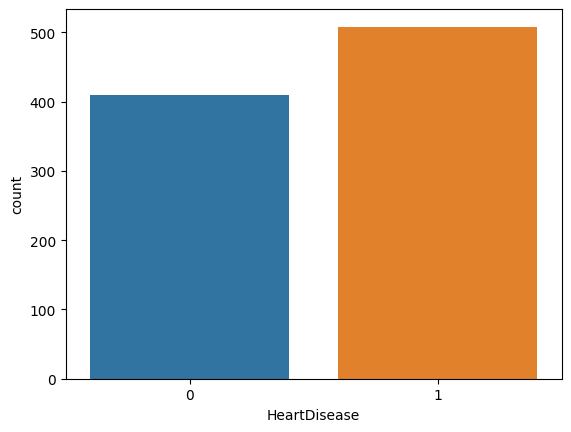

In [9]:
sns.countplot(df,x='HeartDisease')

Almost balanced dataset

In [10]:
col=df.columns
for col in df:
    print(col)
    print(df[col].unique())

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312

1. There are some values in RestingBP and Cholesterol as 0.There might be some error.Replacing these values with mean of that respective column.
2. There is column name FastingBS which means BloodSugar level but we have given only two values 0 and 1.It is not clear what it means when FastingBS 0 and 1.We will remove this column.

In [11]:
#df.drop(['FastingBS','Oldpeak'],inplace=True,axis=1)
#df.drop(['Cholesterol'],inplace=True,axis=1)

In [12]:
for col in df:
    c=0
    for i in df[col]:
        if i==0:
            c=c+1
    print(col,c)        

Age 0
Sex 0
ChestPainType 0
RestingBP 1
Cholesterol 172
FastingBS 704
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 368
ST_Slope 0
HeartDisease 410


In [13]:
df['RestingBP'].replace({0:np.mean(df['RestingBP'])},inplace=True)
df['Cholesterol'].replace({0:np.mean(df['Cholesterol'])},inplace=True)

In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


## Feature Selection

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame containing the dataset
# Extract categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Prepare data
data_categorical = df[categorical_columns]

# Compute chi-square test for each pair of categorical variables
for column in data_categorical.columns:
    contingency_table = pd.crosstab(data_categorical[column], data_categorical['HeartDisease'])
    chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column} vs HeartDisease:")
    print("Chi-square statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:\n", expected_freq)
    print("-------------------------------------")


Chi-square test for Sex vs HeartDisease:
Chi-square statistic: 84.14510134633775
P-value: 4.597617450809164e-20
Degrees of freedom: 1
Expected frequencies:
 [[ 86.19825708 106.80174292]
 [323.80174292 401.19825708]]
-------------------------------------
Chi-square test for ChestPainType vs HeartDisease:
Chi-square statistic: 268.06723902181767
P-value: 8.08372842808765e-58
Degrees of freedom: 3
Expected frequencies:
 [[221.52505447 274.47494553]
 [ 77.26579521  95.73420479]
 [ 90.66448802 112.33551198]
 [ 20.54466231  25.45533769]]
-------------------------------------
Chi-square test for FastingBS vs HeartDisease:
Chi-square statistic: 64.3206790933594
P-value: 1.0573018731809955e-15
Degrees of freedom: 1
Expected frequencies:
 [[314.42265795 389.57734205]
 [ 95.57734205 118.42265795]]
-------------------------------------
Chi-square test for RestingECG vs HeartDisease:
Chi-square statistic: 10.931469339140978
P-value: 0.0042292328167544925
Degrees of freedom: 2
Expected frequencies:


In [16]:
import pandas as pd

columns_to_encode = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130.0,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [17]:
encoded_columns = df_encoded.columns.tolist()

In [18]:
encoded_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [19]:
df_encoded.replace({True:1,False:0},inplace=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130.0,236.0,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


## Outlier Removal

In [20]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]

In [21]:
df.shape

(891, 12)

In [22]:
col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']
df_heatmap = df[col]

<Axes: >

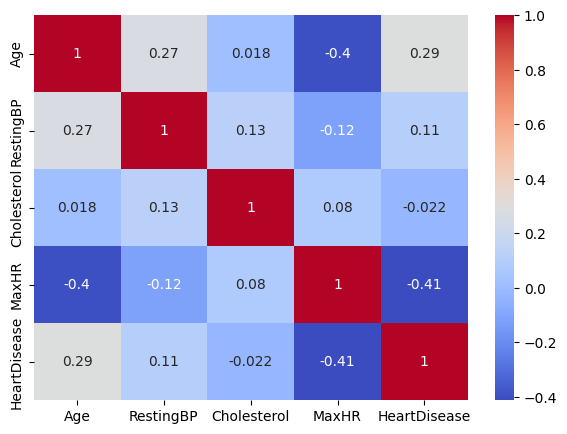

In [23]:
plt.figure(figsize = (7,5))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')

In [24]:
#df_encoded.to_csv('df_encoded.csv', index=False)

In [25]:
data = pd.DataFrame(df_encoded.values, columns=None)

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(data.columns[6],axis=1),data.iloc[:, 6],test_size=0.2,random_state=1)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [28]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
lr_pred=lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,lr_pred))

0.9130434782608695


In [31]:

print(confusion_matrix(y_test,lr_pred))

[[ 65   9]
 [  7 103]]


In [32]:

print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        74
         1.0       0.92      0.94      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



# Logistic Regression with hyperparameter tuning 

In [33]:
lrhp=LogisticRegression()
parameters={
    'C': [ 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs','newton-cg','sag', 'saga'],
    'max_iter':[10000]
}  
grid_search=GridSearchCV(lrhp,parameters,cv=10,scoring='f1_macro') 
grid_search.fit(X_train,y_train) 
print('The Parameters are:',grid_search.best_params_)

The Parameters are: {'C': 10, 'max_iter': 10000, 'solver': 'sag'}


In [34]:
lrhp=LogisticRegression(C = grid_search.best_params_.get('C'),
                           solver = grid_search.best_params_.get('solver'),
                           max_iter = grid_search.best_params_.get('max_iter'))

In [35]:
lrhp.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=10000, solver='sag')

In [36]:
lrhp_pred=lrhp.predict(X_test)

In [37]:
print(accuracy_score(y_test,lrhp_pred))

0.9239130434782609


In [38]:
print(confusion_matrix(y_test,lrhp_pred))

[[ 66   8]
 [  6 104]]


In [39]:
print(classification_report(y_test,lrhp_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        74
         1.0       0.93      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [40]:
fpr_lrhp, tpr_lrhp, thresholds = roc_curve(y_test, lrhp_pred)
roc_auc_lrhp = auc(fpr_lrhp, tpr_lrhp)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
dt_pred=dt.predict(X_test)

In [44]:
print(confusion_matrix(y_test,dt_pred))

[[60 14]
 [31 79]]


In [45]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.73        74
         1.0       0.85      0.72      0.78       110

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.77      0.76      0.76       184



# Decision Tree with Hyperparameter Tuning

In [46]:
dthp=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[2,4,6,8],
            'min_samples_split':[2,4,6,8],
            'min_samples_leaf':[1,2,3,4],
            'max_features':['sqrt','log2'],
} 
grid_search=GridSearchCV(dthp,parameters,cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)
print('The Parameters are:',grid_search.best_params_)

The Parameters are: {'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}


In [47]:
dtrhp=DecisionTreeClassifier(criterion = grid_search.best_params_.get('criterion'),
                           splitter = grid_search.best_params_.get('splitter'),
                           max_depth = grid_search.best_params_.get('max_depth'),
                           max_features = grid_search.best_params_.get('max_features'),
                           min_samples_leaf = grid_search.best_params_.get('min_samples_leaf'),
                           min_samples_split = grid_search.best_params_.get('min_samples_split'))

In [48]:
dthp.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
dthp_pred=dthp.predict(X_test)

In [50]:
print(confusion_matrix(y_test,dthp_pred))

[[63 11]
 [30 80]]


In [51]:
print(classification_report(y_test,dthp_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.85      0.75        74
         1.0       0.88      0.73      0.80       110

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.80      0.78      0.78       184



In [52]:
fpr_dthp, tpr_dthp, thresholds = roc_curve(y_test, dthp_pred)
roc_auc_dthp = auc(fpr_dthp, tpr_dthp)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
rfc_pred=rfc.predict(X_test)

In [56]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        74
         1.0       0.91      0.89      0.90       110

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[64 10]
 [12 98]]


# Random Forest with hyperparameter tuning

In [58]:
rfchp=RandomForestClassifier()
parameters={'criterion':['gini','entropy'],
            'max_depth':[None,6,8,10],
            'min_samples_split':[2,4,6,8],
            'min_samples_leaf':[1,2,3,4],
}
grid_search=GridSearchCV(rfchp,parameters,cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)
print('The Parameters are:',grid_search.best_params_)

The Parameters are: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [59]:
rfchp=RandomForestClassifier(criterion = grid_search.best_params_.get('criterion'),
                           max_depth = grid_search.best_params_.get('max_depth'),
                           max_features = grid_search.best_params_.get('max_features'),
                           min_samples_leaf = grid_search.best_params_.get('min_samples_leaf'),
                           min_samples_split = grid_search.best_params_.get('min_samples_split'))

In [60]:
rfchp.fit(X_train,y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=2,
                       min_samples_split=8)

In [61]:
rfchp_pred=rfchp.predict(X_test)

In [62]:
print(classification_report(y_test,rfchp_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        74
         1.0       0.91      0.88      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [63]:
print(confusion_matrix(y_test,rfchp_pred))

[[64 10]
 [13 97]]


In [64]:
fpr_rfchp, tpr_rfchp, thresholds = roc_curve(y_test, rfchp_pred)
roc_auc_rfchp = auc(fpr_rfchp, tpr_rfchp)

# AdaBoostClassifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [66]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [67]:
abc_pred=abc.predict(X_test)

In [68]:
print(classification_report(y_test,abc_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        74
         1.0       0.93      0.90      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [69]:
cm = confusion_matrix(y_test,abc_pred)
print(confusion_matrix(y_test,abc_pred))

[[67  7]
 [11 99]]


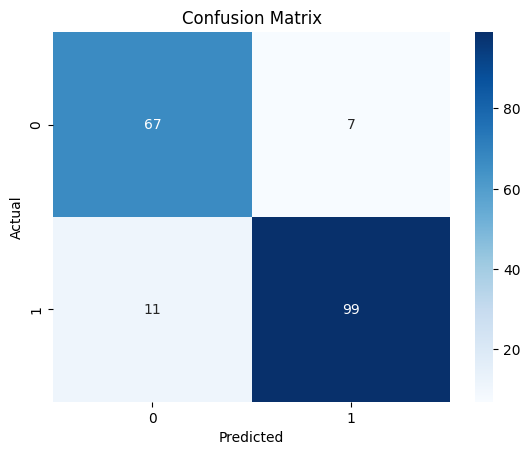

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix
fig = plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('/kaggle/working/cm1.png', dpi=300)
plt.show()

# AdaBoostClassifier with Hyperparameter Tuning

In [71]:
abchp=AdaBoostClassifier()
parameters={'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.5, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
} 
grid_search=GridSearchCV(abchp,parameters,cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)
print('The Parameters are:',grid_search.best_params_)

The Parameters are: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 150}


In [72]:
abchp=AdaBoostClassifier(estimator = grid_search.best_params_.get('estimator'),
                           n_estimators = grid_search.best_params_.get('n_estimators'),
                           learning_rate = grid_search.best_params_.get('learning_rate'),
                           algorithm = grid_search.best_params_.get('algorithm'))

In [73]:
abchp.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=150)

In [74]:
abchp_pred=abchp.predict(X_test)

In [75]:
print(classification_report(y_test,abchp_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        74
         1.0       0.94      0.93      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [76]:
cm = confusion_matrix(y_test,abchp_pred)
print(confusion_matrix(y_test,abchp_pred))

[[ 68   6]
 [  8 102]]


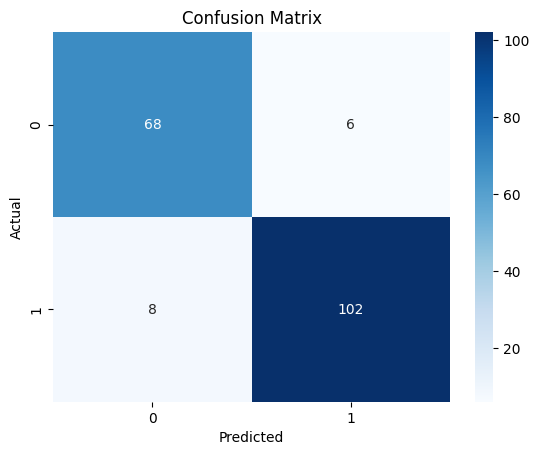

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix
fig = plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('/kaggle/working/cm2.png', dpi=300)
plt.show()

In [78]:
fpr_abchp, tpr_abchp, thresholds = roc_curve(y_test, abchp_pred)
roc_auc_abchp = auc(fpr_abchp, tpr_abchp)

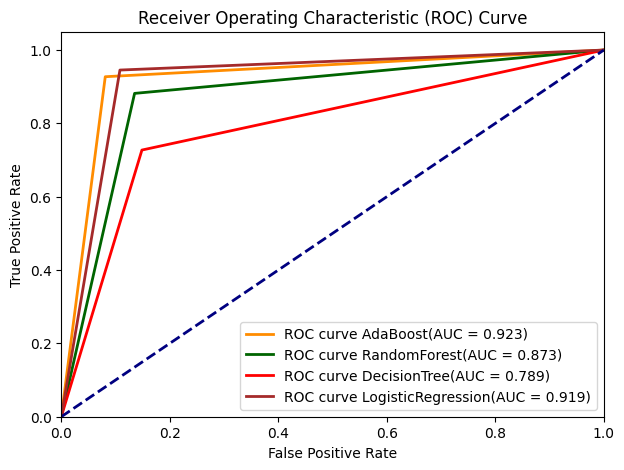

In [79]:
fig = plt.figure(figsize=(7, 5))
plt.plot(fpr_abchp, tpr_abchp, color='darkorange', lw=2, label='ROC curve AdaBoost(AUC = %0.3f)' % roc_auc_abchp)
plt.plot(fpr_rfchp, tpr_rfchp, color='darkgreen', lw=2, label='ROC curve RandomForest(AUC = %0.3f)' % roc_auc_rfchp)
plt.plot(fpr_dthp, tpr_dthp, color='red', lw=2, label='ROC curve DecisionTree(AUC = %0.3f)' % roc_auc_dthp)
plt.plot(fpr_lrhp, tpr_lrhp, color='brown', lw=2, label='ROC curve LogisticRegression(AUC = %0.3f)' % roc_auc_lrhp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save the figure before displaying it
plt.savefig('/kaggle/working/auc2.png', dpi=300)

# Display the figure
plt.show()

import joblib

# Assuming 'model' is your trained scikit-learn model object
# Replace 'model_filename.joblib' with the desired filename
joblib.dump(abchp, 'abchp.joblib')